In [7]:
#Importing the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
export = pd.read_csv(r"C:\Users\USER\Downloads\nigeria_agricultural_exports.csv")
export.head()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode
0,Rubber,Farmgate Nigeria Limited,Austria,11/16/2023,721,31443.05,5863.92,22670439.05,Lagos,Sea
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,1/8/2021,881,23151.97,5868.73,20396885.57,Lagos,Sea
2,Cassava,Farmgate Nigeria Limited,Germany,10/14/2020,702,18536.45,5105.01,13012587.90,Calabar,Sea
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,12/31/2022,191,21981.31,7781.54,4198430.21,Warri,Sea
4,Sesame,Nigeria Agro Export Company,France,12/19/2022,373,13415.94,9590.95,5004145.62,Lagos,Sea


In [9]:
export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         1000 non-null   object 
 1   Company              1000 non-null   object 
 2   Export Country       1000 non-null   object 
 3   Date                 1000 non-null   object 
 4   Units Sold           1000 non-null   int64  
 5   unit_price           1000 non-null   float64
 6   Profit per unit      1000 non-null   float64
 7   Export Value         1000 non-null   float64
 8   Destination Port     1000 non-null   object 
 9   Transportation Mode  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [10]:
#creating a copy of my data
df = export.copy()

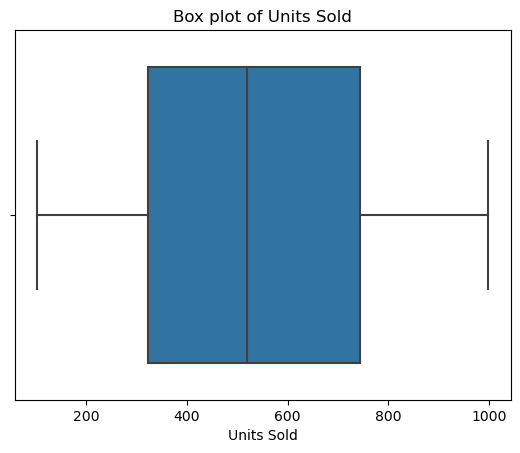

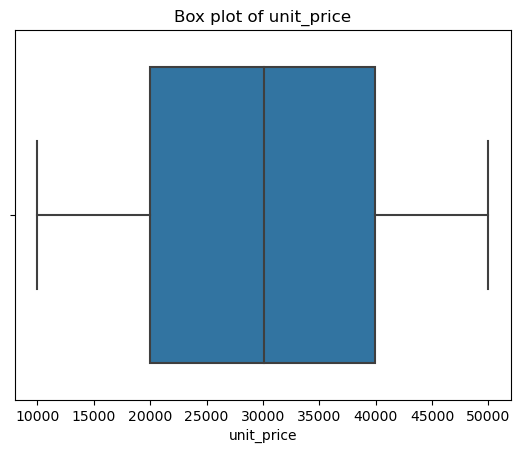

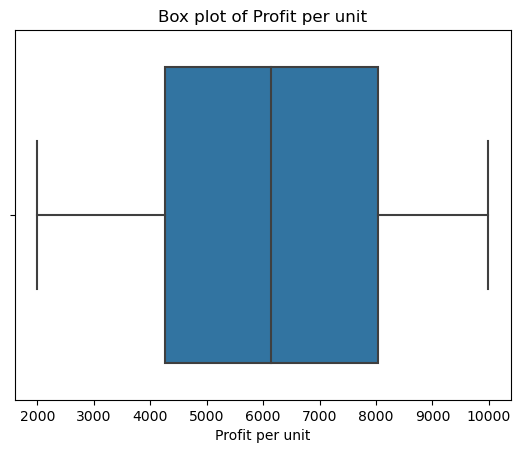

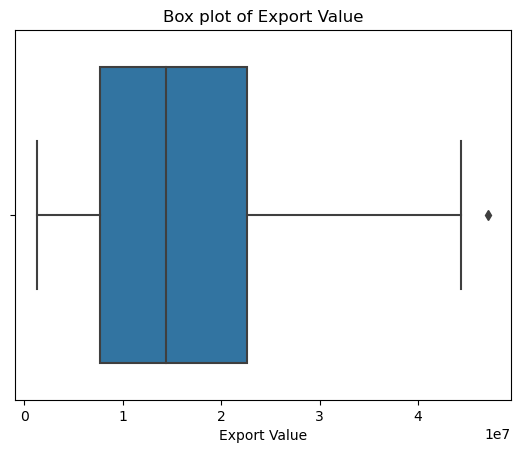

In [11]:
#Checking for outliers using a boxplot
columns = ['Units Sold','unit_price', 'Profit per unit', 'Export Value']
for col in columns:
    sns.boxplot(x=col,data=export)
    plt.title(f'Box plot of {col}')
    plt.show()

# What are the top selling products?

In [12]:
df['Product Name'].value_counts()

Product Name
Cashew      139
Cocoa       136
Sesame      133
Rubber      125
Palm Oil    124
Plantain    122
Cassava     120
Ginger      101
Name: count, dtype: int64

# Which company has the highest sales revenue

Sales revenue is the income a company generates from selling goods or services. It is a critical financial metric indicating the effectiveness of a company's sales strategies and market presence. 

Sales Revenue= Number of Units Sold × Unit_price

In [13]:
df['Sales revenue'] = df['Units Sold'] * df['unit_price']

In [14]:
df.sample()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue
833,Rubber,Agro Allied Exporters Nigeria Limited,France,3/10/2022,309,17372.98,4275.1,5368250.82,Lagos,Sea,5368250.82


In [15]:
df.groupby('Company')['Sales revenue'].sum().sort_values(ascending=False)

Company
Agro Export Nigeria Ltd                      1.867915e+09
Golden Farms Nigeria Limited                 1.732721e+09
Prime Agro Exports Nigeria Limited           1.706072e+09
Nigeria Agro Export Company                  1.704148e+09
Nigerian Export Promotion Council (NEPC)     1.647088e+09
Farmgate Nigeria Limited                     1.615238e+09
Solid Agro Nigeria Limited                   1.541530e+09
Greenfield Agro Exporters Nigeria Limited    1.506893e+09
Agriplus Nigeria Limited                     1.503023e+09
Agro Allied Exporters Nigeria Limited        1.493038e+09
Name: Sales revenue, dtype: float64

Agro Allied Exporters Nigeria Limited returned the lowest sales revenue while Agro Export Nigeria Ltd returned highest sales revenue

# How does sales vary across different export countries?

In [16]:
var_sales = df.groupby('Export Country')['Sales revenue'].sum().sort_values(ascending=False).reset_index()
var_sales

,Export Country,Sales revenue
0,Italy,1.962587e+09
1,Denmark,1.831246e+09
2,France,1.805864e+09
3,Switzerland,1.663790e+09
4,Belgium,1.605707e+09
5,Netherlands,1.534358e+09
6,Austria,1.530521e+09
7,Sweden,1.497263e+09
8,Spain,1.489989e+09
9,Germany,1.396341e+09


In [17]:
total_units = pd.DataFrame(df.groupby('Export Country')['Units Sold'].sum())
metrics = pd.merge(var_sales,total_units,on='Export Country')
metrics

,Export Country,Sales revenue,Units Sold
0,Italy,1.962587e+09,59769
1,Denmark,1.831246e+09,59949
2,France,1.805864e+09,56997
3,Switzerland,1.663790e+09,53929
4,Belgium,1.605707e+09,51850
5,Netherlands,1.534358e+09,50453
6,Austria,1.530521e+09,51883
7,Sweden,1.497263e+09,52187
8,Spain,1.489989e+09,51450
9,Germany,1.396341e+09,48337


In [18]:
#Calculating average revenue
metrics['av_revenue'] = metrics['Sales revenue'] / metrics['Units Sold']

In [19]:
metrics.head()

,Export Country,Sales revenue,Units Sold,av_revenue
0,Italy,1.962587e+09,59769,32836.196410
1,Denmark,1.831246e+09,59949,30546.732937
2,France,1.805864e+09,56997,31683.486198
3,Switzerland,1.663790e+09,53929,30851.484729
4,Belgium,1.605707e+09,51850,30968.304244


C:\Users\USER\AppData\Local\Temp\ipykernel_10808\75187865.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(metrics['Export Country'], rotation=90)
C:\Users\USER\AppData\Local\Temp\ipykernel_10808\75187865.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(metrics['Export Country'], rotation=90)
C:\Users\USER\AppData\Local\Temp\ipykernel_10808\75187865.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(metrics['Export Country'], rotation=90)


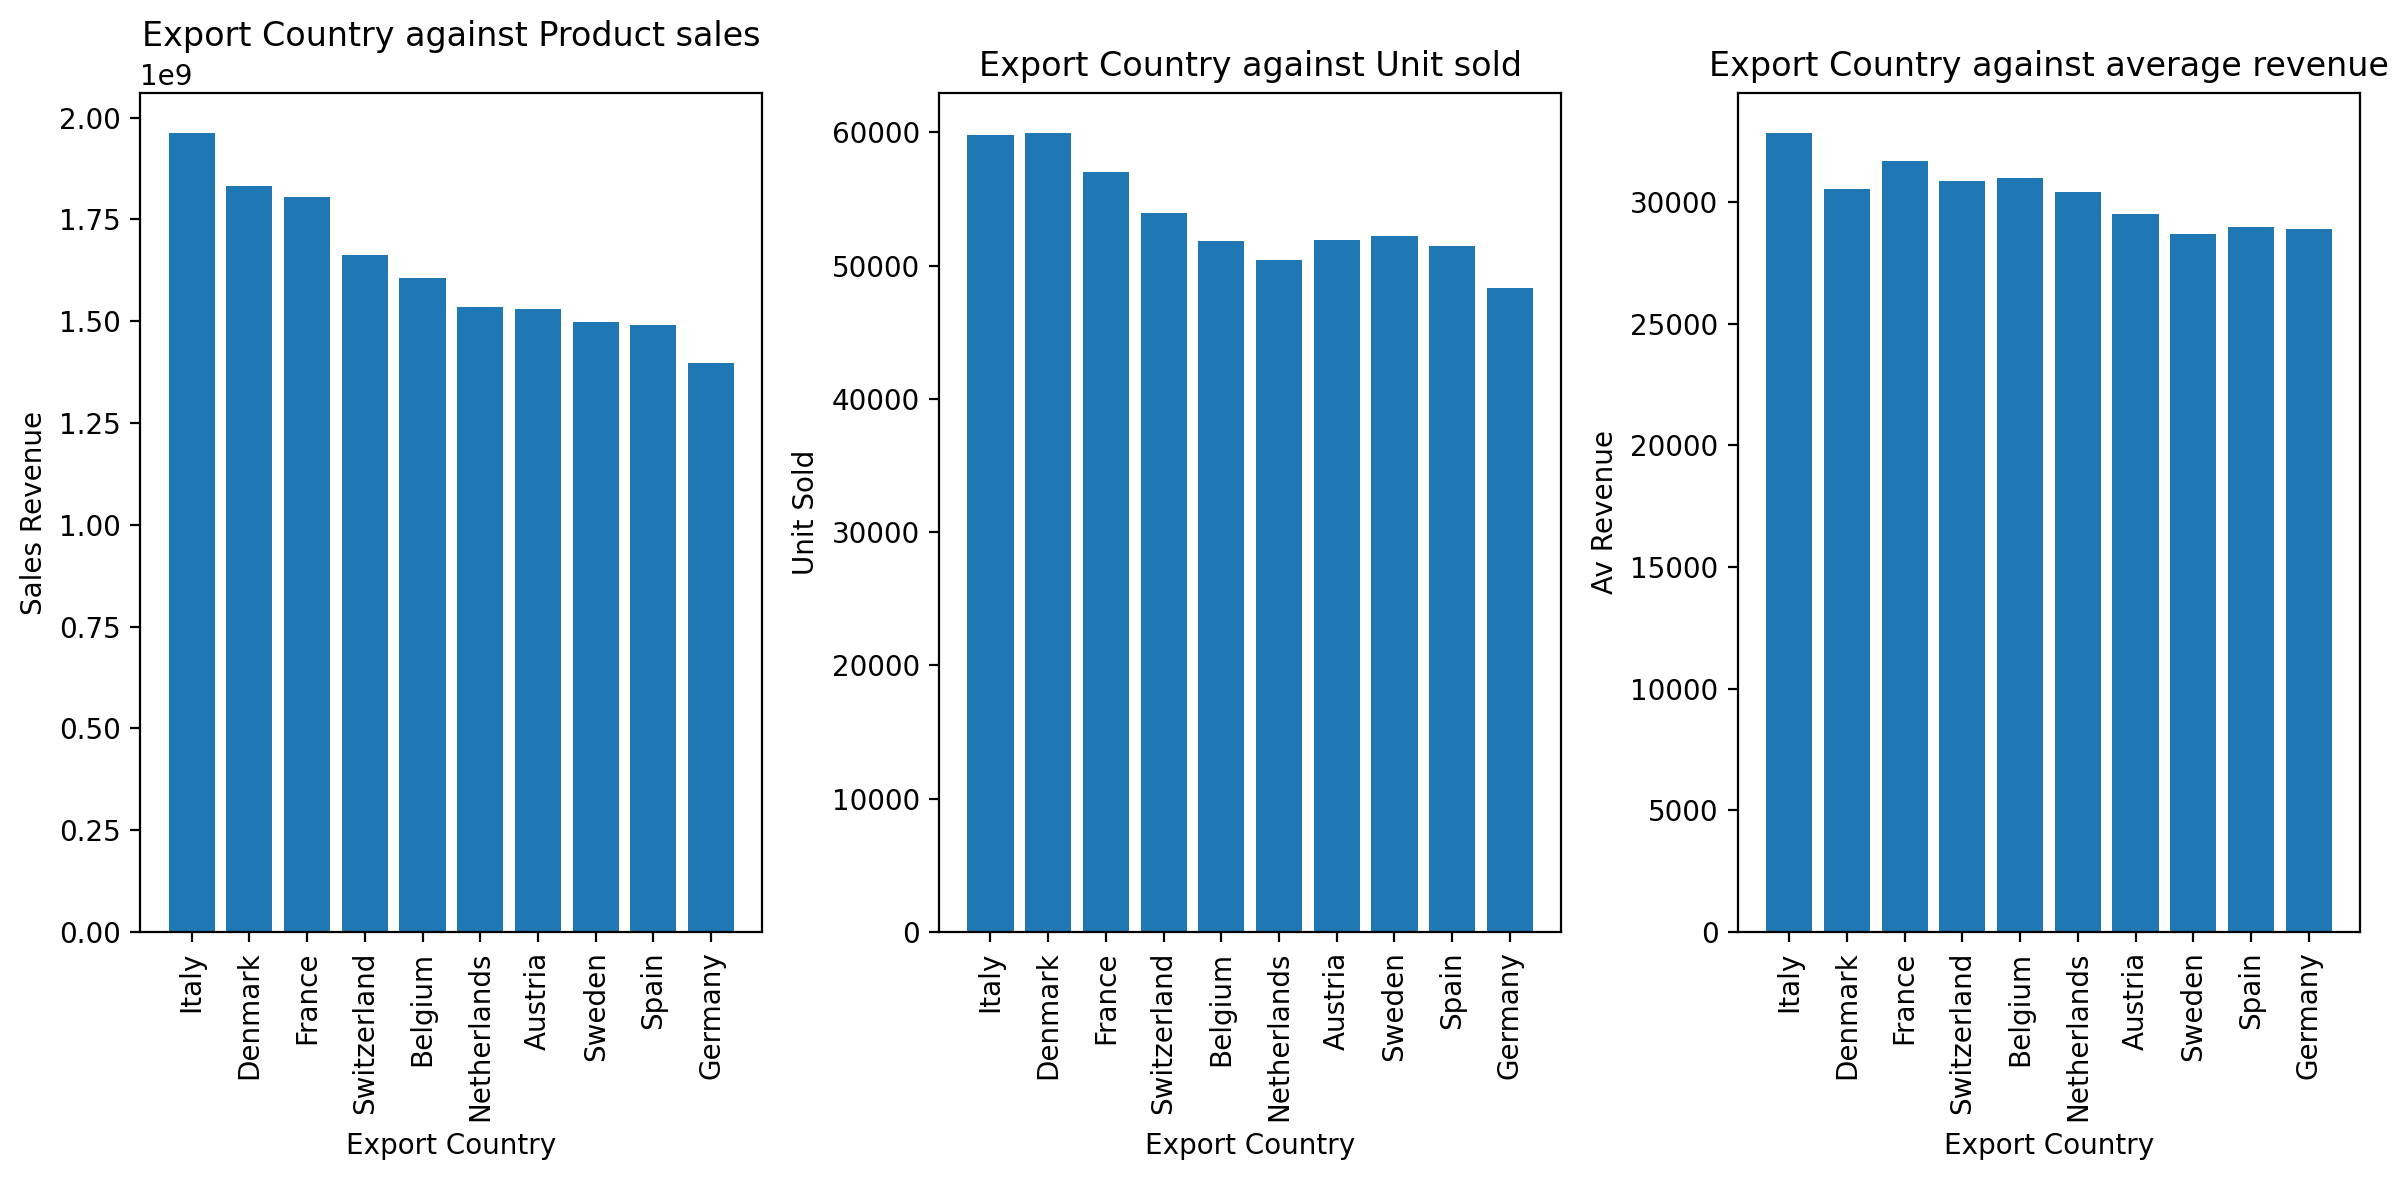

In [30]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=False,figsize=(12,6),dpi=200)

ax1.bar(metrics['Export Country'],metrics['Sales revenue'])
ax1.set_title('Export Country against Product sales')
ax1.set_xticklabels(metrics['Export Country'], rotation=90)
ax1.set_xlabel('Export Country')
ax1.set_ylabel('Sales Revenue')

ax2.bar(metrics['Export Country'], metrics['Units Sold'])
ax2.set_title('Export Country against Unit sold')
ax2.set_xticklabels(metrics['Export Country'], rotation=90)
ax2.set_xlabel('Export Country')
ax2.set_ylabel('Unit Sold')


ax3.bar(metrics['Export Country'],metrics['av_revenue'])
ax3.set_title('Export Country against average revenue')
ax3.set_xticklabels(metrics['Export Country'], rotation=90)
ax3.set_xlabel('Export Country')
ax3.set_ylabel('Av Revenue')

plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()

In [31]:
df.sample()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue
236,Palm Oil,Agro Export Nigeria Ltd,Denmark,6/14/2023,211,16085.4,7668.27,3394019.4,Port Harcourt,Sea,3394019.4


In [20]:
#metrics.drop(columns=['Profit per unit_x','Profit per unit_y'],axis=1,inplace=True)

In [32]:
profit_gen = pd.DataFrame(df.groupby('Export Country')['Profit per unit'].sum())
metrics = pd.merge(metrics,profit_gen,on='Export Country')
metrics

,Export Country,Sales revenue,Units Sold,av_revenue,Profit per unit
0,Italy,1.962587e+09,59769,32836.196410,635424.93
1,Denmark,1.831246e+09,59949,30546.732937,683564.13
2,France,1.805864e+09,56997,31683.486198,658612.34
3,Switzerland,1.663790e+09,53929,30851.484729,613895.01
4,Belgium,1.605707e+09,51850,30968.304244,604163.38
5,Netherlands,1.534358e+09,50453,30411.639239,598013.36
6,Austria,1.530521e+09,51883,29499.469126,648395.46
7,Sweden,1.497263e+09,52187,28690.335252,626278.64
8,Spain,1.489989e+09,51450,28959.940139,536416.62
9,Germany,1.396341e+09,48337,28887.621649,520535.68


In [22]:
#metrics.drop(columns=['Profit per unit_x','Profit per unit_y'],axis=1,inplace=True)

In [33]:
metrics

,Export Country,Sales revenue,Units Sold,av_revenue,Profit per unit
0,Italy,1.962587e+09,59769,32836.196410,635424.93
1,Denmark,1.831246e+09,59949,30546.732937,683564.13
2,France,1.805864e+09,56997,31683.486198,658612.34
3,Switzerland,1.663790e+09,53929,30851.484729,613895.01
4,Belgium,1.605707e+09,51850,30968.304244,604163.38
5,Netherlands,1.534358e+09,50453,30411.639239,598013.36
6,Austria,1.530521e+09,51883,29499.469126,648395.46
7,Sweden,1.497263e+09,52187,28690.335252,626278.64
8,Spain,1.489989e+09,51450,28959.940139,536416.62
9,Germany,1.396341e+09,48337,28887.621649,520535.68


In [24]:
#profit_gen = pd.DataFrame(df.groupby('Export Country')['Profit per unit'].sum())
#metrics = pd.merge(metrics,profit_gen,on='Export Country')
#metrics

In [34]:
metrics['Profit generated'] = metrics['Units Sold'] * metrics['Profit per unit']
metrics

,Export Country,Sales revenue,Units Sold,av_revenue,Profit per unit,Profit generated
0,Italy,1.962587e+09,59769,32836.196410,635424.93,3.797871e+10
1,Denmark,1.831246e+09,59949,30546.732937,683564.13,4.097899e+10
2,France,1.805864e+09,56997,31683.486198,658612.34,3.753893e+10
3,Switzerland,1.663790e+09,53929,30851.484729,613895.01,3.310674e+10
4,Belgium,1.605707e+09,51850,30968.304244,604163.38,3.132587e+10
5,Netherlands,1.534358e+09,50453,30411.639239,598013.36,3.017157e+10
6,Austria,1.530521e+09,51883,29499.469126,648395.46,3.364070e+10
7,Sweden,1.497263e+09,52187,28690.335252,626278.64,3.268360e+10
8,Spain,1.489989e+09,51450,28959.940139,536416.62,2.759864e+10
9,Germany,1.396341e+09,48337,28887.621649,520535.68,2.516113e+10


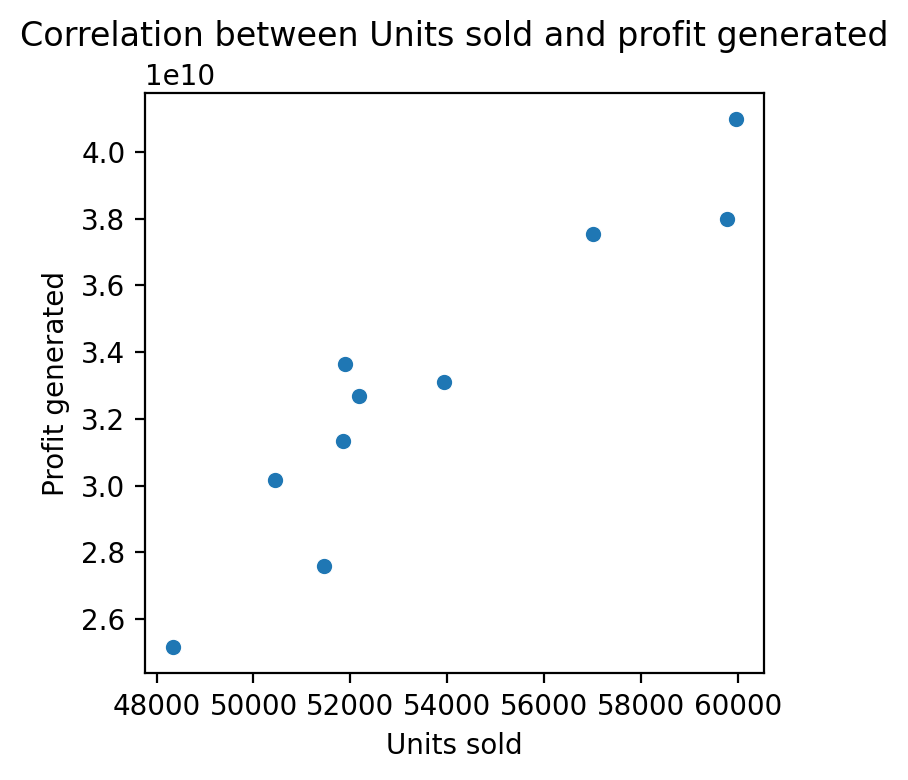

In [58]:
plt.figure(figsize=(4,4),dpi=200)
sns.scatterplot(x='Units Sold',y='Profit generated',data=metrics)
plt.title('Correlation between Units sold and profit generated')
plt.xlabel('Units sold')
plt.ylabel('Profit generated')
plt.tight_layout()
plt.show()

In [59]:
correlation = metrics['Profit generated'].corr(metrics['Units Sold'])

print(f"The Pearson correlation coefficient between Profit Generated and Units Sold is: {correlation:.2f}")

The Pearson correlation coefficient between Profit Generated and Units Sold is: 0.94


There is a clear correlation between the two features

In [60]:
df.sample()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue
583,Sesame,Agro Allied Exporters Nigeria Limited,Switzerland,5/7/2023,248,30929.2,2548.66,7670441.6,Lagos,Sea,7670441.6


# WORKING WITH TIME-SERIES:


How do sales vary over time(monthly, quarterly, annually)

Are ther any seasonal trends in sales?

Is there a relationship between the date of purchase and the profit margin?

In [61]:
df['Date'].dtype

dtype('O')

In [64]:
#Converting to the correct datatype
df['Date'] = pd.to_datetime(df['Date'])
df.Date.dtype

dtype('<M8[ns]')

In [65]:
df.sample()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue
65,Cashew,Greenfield Agro Exporters Nigeria Limited,Germany,2022-04-08,253,10966.93,2635.2,2774633.29,Port Harcourt,Sea,2774633.29


In [66]:
df.insert(4,'year',df.Date.dt.year)
df.insert(5,'month',df.Date.dt.month)
df.head(3)

,Product Name,Company,Export Country,Date,year,month,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue
0,Rubber,Farmgate Nigeria Limited,Austria,2023-11-16,2023,11,721,31443.05,5863.92,22670439.05,Lagos,Sea,22670439.05
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,2021-01-08,2021,1,881,23151.97,5868.73,20396885.57,Lagos,Sea,20396885.57
2,Cassava,Farmgate Nigeria Limited,Germany,2020-10-14,2020,10,702,18536.45,5105.01,13012587.90,Calabar,Sea,13012587.90


In [33]:
#df.drop(columns='Month_name')

In [67]:
#Mapping the numerical representation of the month and then returning the month name by using the pop function
dmap = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['Month_name'] = df['month'].map(dmap)
df.insert(6,'Month_name',df.pop('Month_name'))
df.head()


,Product Name,Company,Export Country,Date,year,month,Month_name,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue
0,Rubber,Farmgate Nigeria Limited,Austria,2023-11-16,2023,11,November,721,31443.05,5863.92,22670439.05,Lagos,Sea,22670439.05
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,2021-01-08,2021,1,January,881,23151.97,5868.73,20396885.57,Lagos,Sea,20396885.57
2,Cassava,Farmgate Nigeria Limited,Germany,2020-10-14,2020,10,October,702,18536.45,5105.01,13012587.90,Calabar,Sea,13012587.90
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,2022-12-31,2022,12,December,191,21981.31,7781.54,4198430.21,Warri,Sea,4198430.21
4,Sesame,Nigeria Agro Export Company,France,2022-12-19,2022,12,December,373,13415.94,9590.95,5004145.62,Lagos,Sea,5004145.62


# Variation of sales annually

In [69]:
var_year_sales = df.groupby('year')['Sales revenue'].sum().reset_index().sort_values(by= 'Sales revenue',ascending=False)
var_year_sales

,year,Sales revenue
1,2021,4.461998e+09
3,2023,4.187771e+09
0,2020,3.891727e+09
2,2022,3.776169e+09


2021 presented the highest sales revenue followed by 2023 with 2022 presenting the least revenue. This makes sense because of the impact of COVID-19

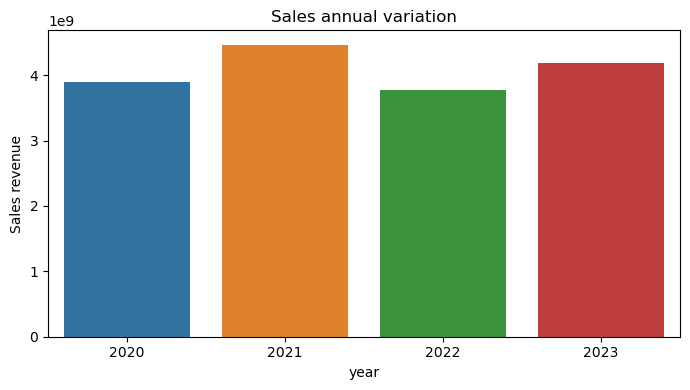

In [71]:
#Graph showing the variation of sales revenue annually
plt.figure(figsize = (7,4))
sns.barplot(x='year',y='Sales revenue',data=var_year_sales)
plt.title('Sales annual variation')
plt.tight_layout()
plt.show()

In [73]:
#Conditional selection for each of the year in the dataset. This would enable us to extract the months in each of these year 
#and then calculate the monthly sales revenue for each year
year2023 = df[df['year']==2023]
year2022 = df[df['year']==2022]
year2021 = df[df['year']==2021]
year2020 = df[df['year']==2020]

In [74]:
#First, we check to know whether there is a particular month in each of these year that also returns a high revenue in sales
var_by_totalmonth = df.groupby('Month_name')['Sales revenue'].sum().reset_index().sort_values(by= 'Sales revenue',ascending=False)
var_by_totalmonth

,Month_name,Sales revenue
9,November,1.531515e+09
10,October,1.493829e+09
7,March,1.469177e+09
3,February,1.438373e+09
2,December,1.425332e+09
8,May,1.402206e+09
6,June,1.393276e+09
5,July,1.364629e+09
0,April,1.289974e+09
1,August,1.287476e+09


In [98]:
#Checking for the sales return in the months of 2023
var_month_2023= year2023.groupby('Month_name')['Sales revenue'].sum().reset_index().sort_values(by= 'Sales revenue',ascending=False)
var_month_2022= year2022.groupby('Month_name')['Sales revenue'].sum().reset_index().sort_values(by= 'Sales revenue',ascending=False)
var_month_2021= year2021.groupby('Month_name')['Sales revenue'].sum().reset_index().sort_values(by= 'Sales revenue',ascending=False)
var_month_2020= year2020.groupby('Month_name')['Sales revenue'].sum().reset_index().sort_values(by= 'Sales revenue',ascending=False)

In [89]:
monthly_sales_rev = pd.concat([var_month_2020,var_month_2021,var_month_2022,var_month_2023],axis=1)
monthly_sales_rev.columns = ['Month_name','2020_sales_rev','Month_name2','2021_sales_rev','Month_name3','2022_sales_rev','Month_name4','2023_sales_rev']
monthly_sales_rev.drop(columns=['Month_name2','Month_name3','Month_name4'],axis=1,inplace=True)
monthly_sales_rev.reset_index(drop=True,inplace=True)

In [103]:
monthly_sales_rev

,Month_name,2020_sales_rev,2021_sales_rev,2022_sales_rev,2023_sales_rev
0,July,4.629118e+08,3.294826e+08,3.300657e+08,2.421686e+08
1,November,4.367588e+08,3.958900e+08,2.370618e+08,4.618043e+08
2,August,3.730142e+08,2.117547e+08,3.584380e+08,3.442695e+08
3,December,3.341789e+08,5.572905e+08,1.586734e+08,3.751889e+08
4,September,3.258666e+08,1.302426e+08,2.407483e+08,4.244673e+08
5,March,2.944817e+08,5.556363e+08,3.144918e+08,3.045668e+08
6,June,2.909952e+08,3.417706e+08,4.464785e+08,3.140323e+08
7,April,2.895161e+08,3.722484e+08,2.987929e+08,3.294171e+08
8,February,2.784104e+08,4.636828e+08,3.661843e+08,3.300953e+08
9,January,2.718522e+08,1.595513e+08,3.294680e+08,3.396814e+08


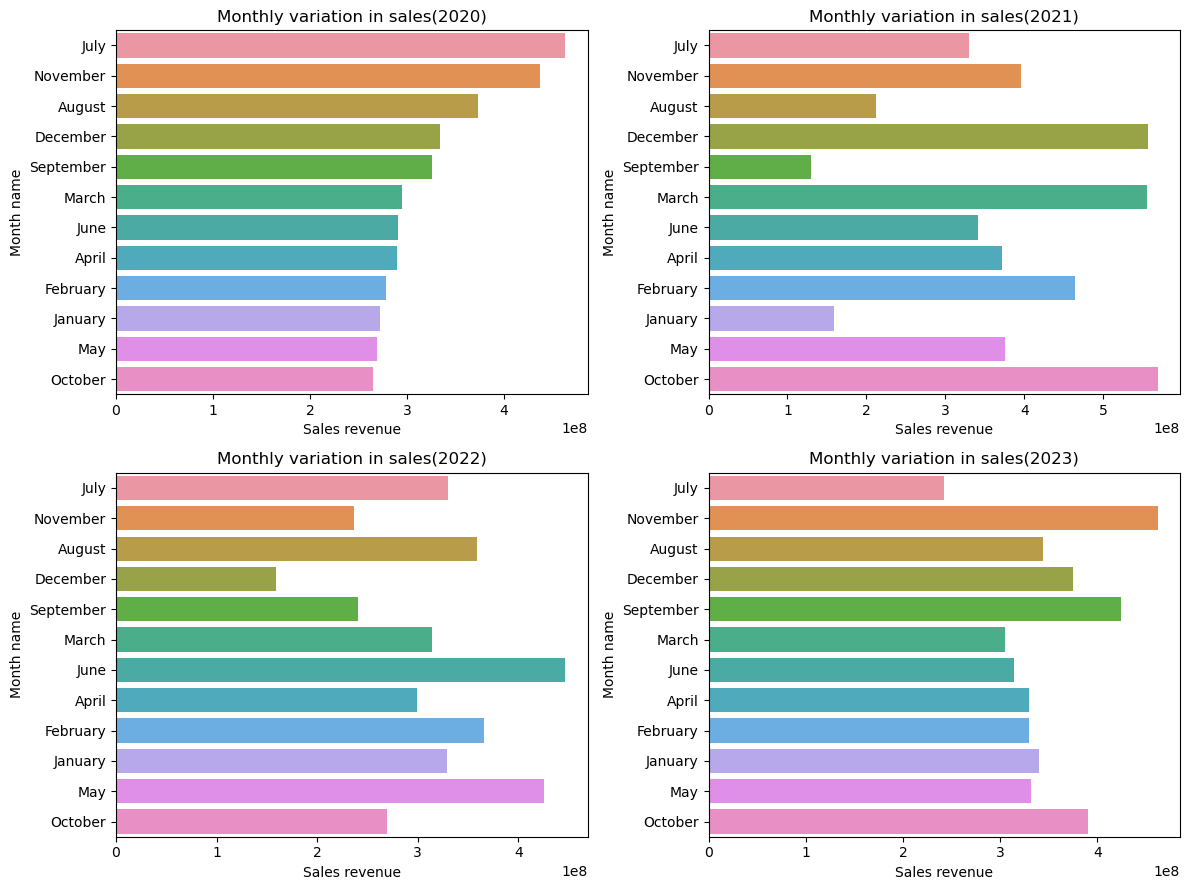

In [131]:
fig,ax = plt.subplots(2,2,figsize=(12,9),dpi=100)
sns.barplot(x='2020_sales_rev',y='Month_name',data=monthly_sales_rev,ax=ax[0][0])
ax[0][0].set_title('Monthly variation in sales(2020)')
ax[0][0].set_xlabel('Sales revenue')
ax[0][0].set_ylabel('Month name')


sns.barplot(x='2021_sales_rev',y='Month_name',data=monthly_sales_rev,ax=ax[0][1])
ax[0][1].set_title('Monthly variation in sales(2021)')
ax[0][1].set_xlabel('Sales revenue')
ax[0][1].set_ylabel('Month name')


sns.barplot(x='2022_sales_rev',y='Month_name',data=monthly_sales_rev,ax=ax[1][0])
ax[1][0].set_title('Monthly variation in sales(2022)')
ax[1][0].set_xlabel('Sales revenue')
ax[1][0].set_ylabel('Month name')

sns.barplot(x='2023_sales_rev',y='Month_name',data=monthly_sales_rev,ax=ax[1][1])
ax[1][1].set_title('Monthly variation in sales(2023)')
ax[1][1].set_xlabel('Sales revenue')
ax[1][1].set_ylabel('Month name')

plt.subplots_adjust(wspace=1.5,hspace=1)
plt.tight_layout()
plt.show()

In [145]:
#calculating for variation with respect to sales variation by quarter
df['Quarter'] = df['Date'].dt.to_period('Q')
quarterly_sales = df.groupby('Quarter')['Sales revenue'].sum()
quarterly_sales = pd.DataFrame(quarterly_sales.reset_index())
quarterly_sales

,Quarter,Sales revenue
0,2020Q1,8.447444e+08
1,2020Q2,8.496099e+08
2,2020Q3,1.161793e+09
3,2020Q4,1.035580e+09
4,2021Q1,1.178870e+09
5,2021Q2,1.089659e+09
6,2021Q3,6.714799e+08
7,2021Q4,1.521988e+09
8,2022Q1,1.010144e+09
9,2022Q2,1.171183e+09


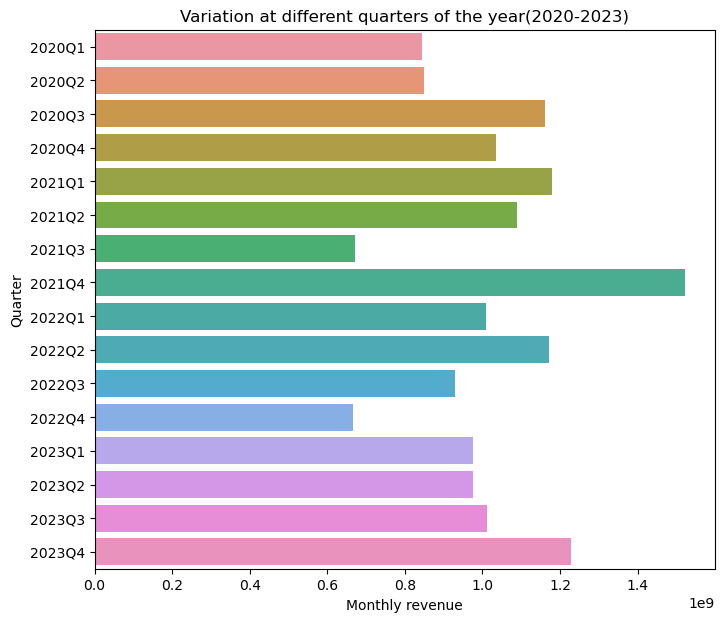

In [154]:
plt.figure(figsize=(8,7))
sns.barplot(data=quarterly_sales,x='Sales revenue',y='Quarter')
plt.xlabel('Monthly revenue')
plt.ylabel('Quarter')
plt.title('Variation at different quarters of the year(2020-2023)')
plt.show()

In [156]:
df.head(2)

,Product Name,Company,Export Country,Date,year,month,Month_name,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue,Quarter
0,Rubber,Farmgate Nigeria Limited,Austria,2023-11-16,2023,11,November,721,31443.05,5863.92,22670439.05,Lagos,Sea,22670439.05,2023Q4
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,2021-01-08,2021,1,January,881,23151.97,5868.73,20396885.57,Lagos,Sea,20396885.57,2021Q1


# Calculating for profit margin. You need to calculate profit generated

In [157]:
df['Profit generated'] = df['Units Sold'] * df['Profit per unit']
df['Profit margin'] = (df['Profit generated'] / df['Sales revenue']) * 100
df.sample()

,Product Name,Company,Export Country,Date,year,month,Month_name,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue,Quarter,Profit generated,Profit margin
431,Rubber,Agro Export Nigeria Ltd,Switzerland,2023-03-23,2023,3,March,741,28606.38,6771.24,21197327.58,Lagos,Sea,21197327.58,2023Q1,5017488.84,23.670384


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


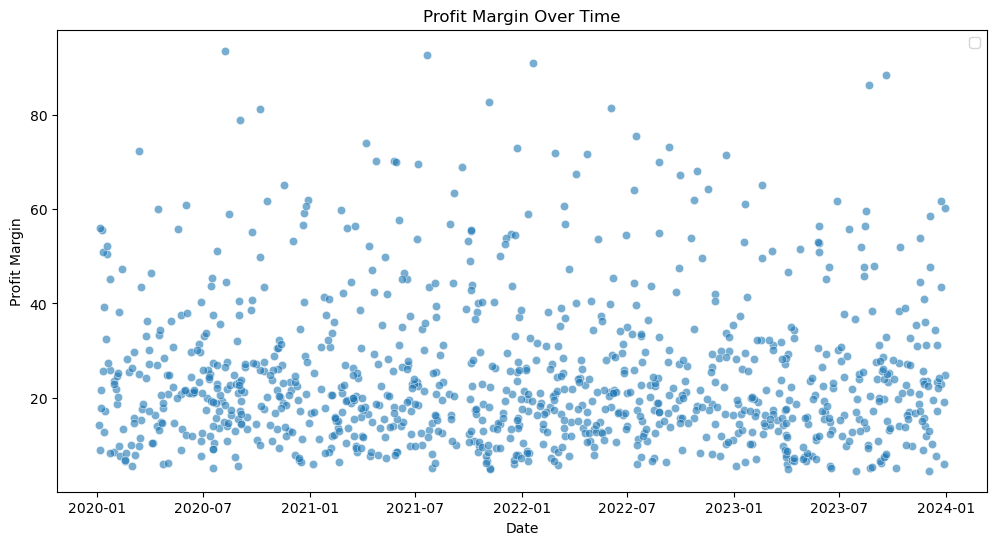

In [47]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Date', y='Profit margin',alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.title('Profit Margin Over Time')
plt.legend()
plt.show()

In [48]:
df['Date_Ordinal'] = df['Date'].apply(lambda x: x.toordinal())
corr_pearson = df[['Date_Ordinal', 'Profit margin']].corr().iloc[0, 1]
print(f"Pearson correlation coeffient: {corr_pearson:2f}")

Pearson correlation coeffient: -0.017115


# What is the cost of goods sold (COGS) as a percentage of revenue and how does the COGS vary across different products 

In [158]:
df['COGS'] = df['Units Sold'] * (df['unit_price'] - df['Profit per unit'])

# Calculate COGS Ratio
df['COGS Ratio (%)'] = (df['COGS'] / df['Export Value']) * 100

In [159]:
df.head(1)

,Product Name,Company,Export Country,Date,year,month,Month_name,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue,Quarter,Profit generated,Profit margin,COGS,COGS Ratio (%)
0,Rubber,Farmgate Nigeria Limited,Austria,2023-11-16,2023,11,November,721,31443.05,5863.92,22670439.05,Lagos,Sea,22670439.05,2023Q4,4227886.32,18.649336,18442552.73,81.350664


In [160]:
cogs_vary = pd.DataFrame(df.groupby('Product Name')['COGS Ratio (%)'].sum())
cogs_vary= cogs_vary.reset_index().sort_values(by='COGS Ratio (%)',ascending=False)

In [161]:
cogs_vary

,Product Name,COGS Ratio (%)
2,Cocoa,10625.799145
0,Cashew,10421.505467
7,Sesame,9897.541906
6,Rubber,9714.932194
4,Palm Oil,9301.058558
5,Plantain,9288.642573
1,Cassava,8661.510539
3,Ginger,7526.268183


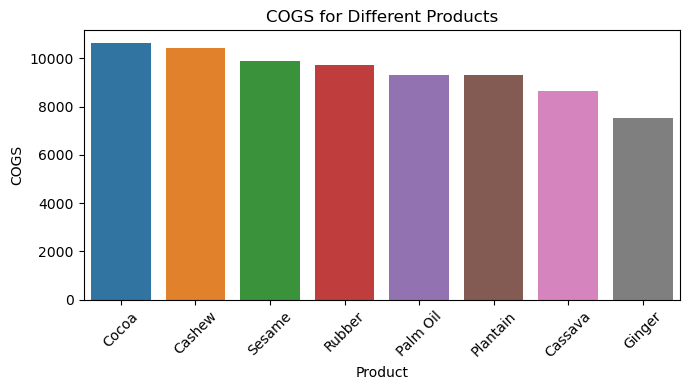

In [162]:
plt.figure(figsize=(7, 4))
sns.barplot(x='Product Name', y='COGS Ratio (%)', data =cogs_vary)
plt.xlabel('Product')
plt.ylabel('COGS')
plt.title('COGS for Different Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [163]:
df.head(1)

,Product Name,Company,Export Country,Date,year,month,Month_name,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue,Quarter,Profit generated,Profit margin,COGS,COGS Ratio (%)
0,Rubber,Farmgate Nigeria Limited,Austria,2023-11-16,2023,11,November,721,31443.05,5863.92,22670439.05,Lagos,Sea,22670439.05,2023Q4,4227886.32,18.649336,18442552.73,81.350664


# Which destination ports recieve the highest volume of exports

In [62]:
dest_plot = df['Destination Port'].value_counts().reset_index()
dest_plot

,Destination Port,count
0,Lagos,599
1,Warri,141
2,Port Harcourt,133
3,Calabar,127


<Axes: xlabel='Destination Port', ylabel='count'>

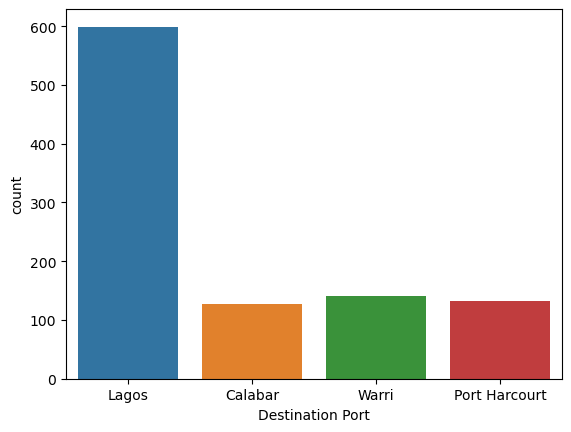

In [64]:
sns.countplot(x='Destination Port',data=df)

In [164]:
df.sample()

,Product Name,Company,Export Country,Date,year,month,Month_name,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue,Quarter,Profit generated,Profit margin,COGS,COGS Ratio (%)
242,Plantain,Golden Farms Nigeria Limited,Switzerland,2022-08-11,2022,8,August,780,16243.24,7099.21,12669727.2,Port Harcourt,Sea,12669727.2,2022Q3,5537383.8,43.705628,7132343.4,56.294372


# What are the transportation modes commonly used for export and rank the transportation modes commonly used for export

In [166]:
df['Transportation Mode'].unique()

array(['Sea'], dtype=object)

In [167]:
rank_dest = df.groupby('Destination Port')['Export Value'].sum().reset_index()
rank_dest

,Destination Port,Export Value
0,Calabar,2.078188e+09
1,Lagos,9.738667e+09
2,Port Harcourt,2.152910e+09
3,Warri,2.347900e+09


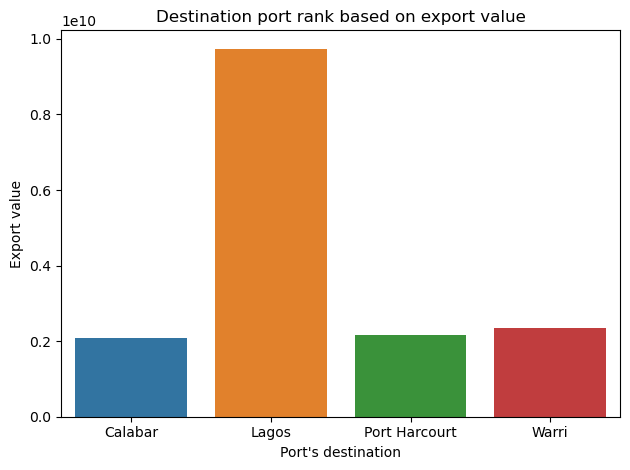

In [168]:
sns.barplot(data=rank_dest,x='Destination Port',y='Export Value')
plt.xlabel("Port's destination")
plt.ylabel('Export value')
plt.title('Destination port rank based on export value')
plt.tight_layout()
plt.show()

In [169]:
df.sample()

,Product Name,Company,Export Country,Date,year,month,Month_name,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Sales revenue,Quarter,Profit generated,Profit margin,COGS,COGS Ratio (%)
603,Cashew,Agro Export Nigeria Ltd,Switzerland,2023-05-03,2023,5,May,600,35084.68,5515.51,21050808.0,Warri,Sea,21050808.0,2023Q2,3309306.0,15.720565,17741502.0,84.279435


In [170]:
 df.groupby('Destination Port')['Product Name'].value_counts()

Destination Port  Product Name
Calabar           Sesame          26
                  Cassava         18
                  Rubber          18
                  Cocoa           18
                  Cashew          15
                  Plantain        12
                  Palm Oil        10
                  Ginger          10
Lagos             Cashew          93
                  Cocoa           79
                  Palm Oil        74
                  Plantain        74
                  Rubber          74
                  Sesame          72
                  Cassava         70
                  Ginger          63
Port Harcourt     Palm Oil        23
                  Cashew          18
                  Cocoa           18
                  Plantain        17
                  Sesame          17
                  Cassava         15
                  Ginger          14
                  Rubber          11
Warri             Rubber          22
                  Cocoa           21
       

# How does each product perform in terms of profit margin

In [83]:
df.groupby('Product Name')['Profit margin'].sum().sort_values(ascending=False).reset_index()

,Product Name,Profit margin
0,Cashew,3478.494533
1,Sesame,3402.458094
2,Cassava,3338.489461
3,Palm Oil,3098.941442
4,Cocoa,2974.200855
5,Plantain,2911.357427
6,Rubber,2785.067806
7,Ginger,2573.731817


In [84]:
df.groupby('Company')['Units Sold'].sum()

Company
Agriplus Nigeria Limited                     52139
Agro Allied Exporters Nigeria Limited        47204
Agro Export Nigeria Ltd                      59944
Farmgate Nigeria Limited                     52010
Golden Farms Nigeria Limited                 60724
Greenfield Agro Exporters Nigeria Limited    50633
Nigeria Agro Export Company                  54717
Nigerian Export Promotion Council (NEPC)     55833
Prime Agro Exports Nigeria Limited           52035
Solid Agro Nigeria Limited                   51565
Name: Units Sold, dtype: int64

# Comparing the performance of different companies based on units sold and profit generated

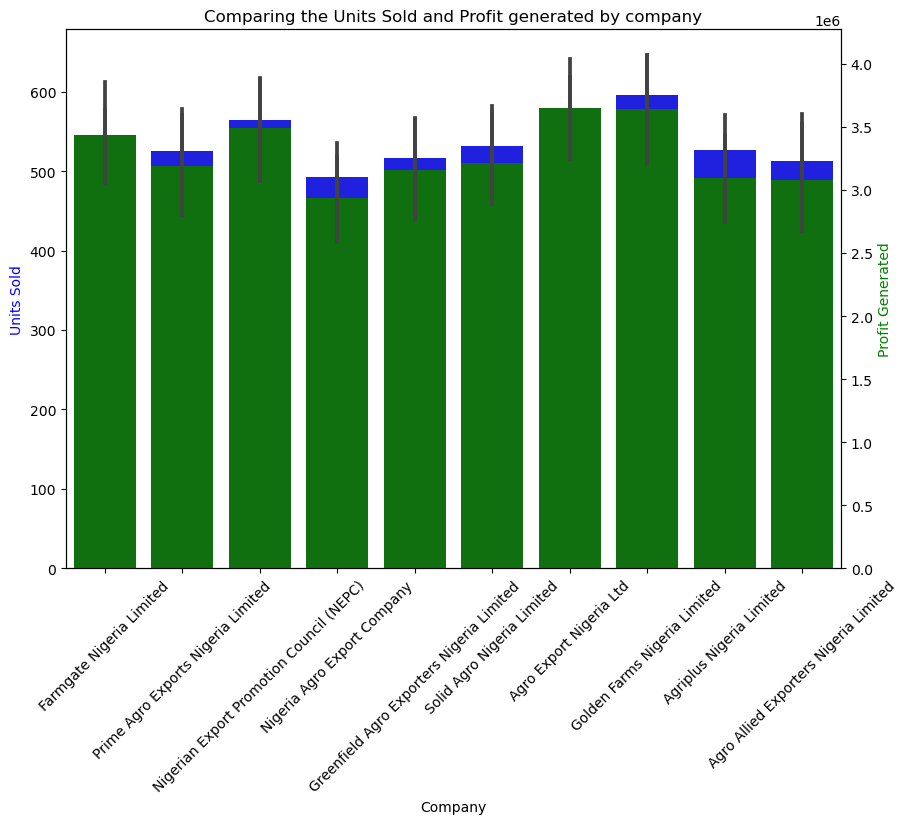

In [171]:
fig, ax1 = plt.subplots(figsize=(10,7))
sns.barplot(x='Company',y='Units Sold',data=df,ax=ax1, color='blue')
ax1.set_ylabel('Units Sold',color='blue')
ax1.set_title('Comparing the Units Sold and Profit generated by company')

ax2 = ax1.twinx()
sns.barplot(x='Company',y='Profit generated',data=df,ax=ax2,color='green')
ax2.set_ylabel('Profit Generated', color='green')

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

In [107]:
df3.groupby('Company')[['Units Sold','Profit generated']].sum().sort_values(by='Units Sold',ascending=False)

,Units Sold,Profit generated
Company,,
Golden Farms Nigeria Limited,60724,3.713020e+08
Agro Export Nigeria Ltd,59944,3.830520e+08
Nigerian Export Promotion Council (NEPC),55833,3.456396e+08
Nigeria Agro Export Company,54717,3.256596e+08
Agriplus Nigeria Limited,52139,3.062263e+08
Prime Agro Exports Nigeria Limited,52035,3.156109e+08
Farmgate Nigeria Limited,52010,3.369663e+08
Solid Agro Nigeria Limited,51565,3.119486e+08
Greenfield Agro Exporters Nigeria Limited,50633,3.092148e+08


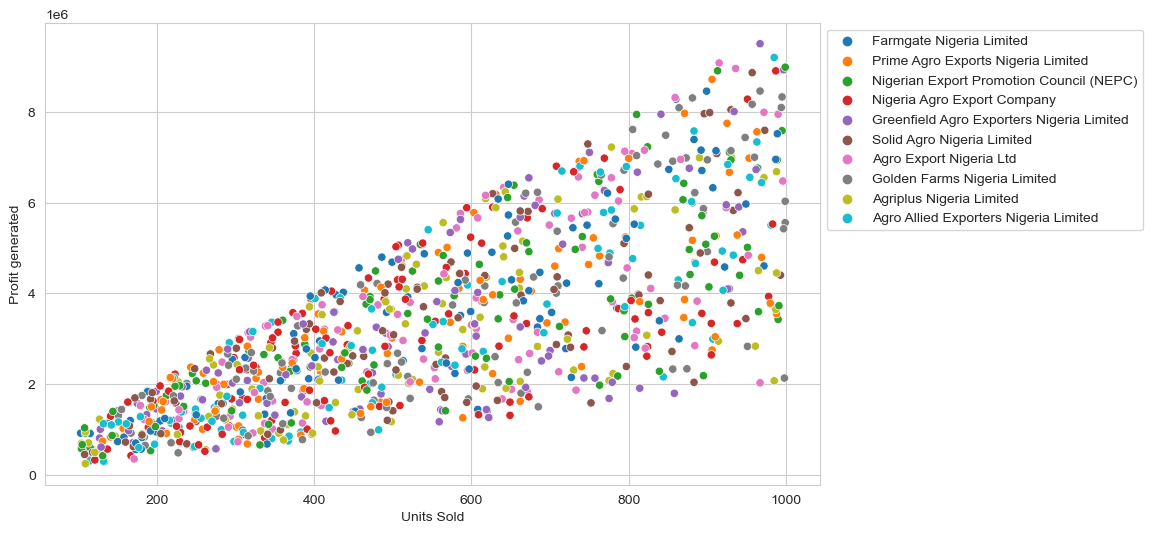

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Profit generated', data=df3,hue='Company')
plt.legend(loc='best', bbox_to_anchor=(1, 1))